In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns
sns.set_style('darkgrid')

/kaggle/input/flipkart-total-sales/flipkart_com-ecommerce_sample.csv


**What is the problem?
The aim is to analyze the Flipkart sales dataset to understand customer preferences, product performance, and sales trends. The analysis will focus on identifying the most popular categories, brands, pricing strategies, and customer ratings.**

**Why is it important to solve it?
Solving this problem will help Flipkart make data-driven decisions to improve product listings, pricing strategies, and customer satisfaction. The insights gained from this analysis could lead to increased sales, better customer retention, and improved overall business performance.**

**Data Dictionary**

1. uniq_id: Unique identifier for each product.
   Type: String
   Description: This can be used to uniquely identify each product in the dataset.

2. crawl_timestamp: Timestamp when the data was crawled.
   Type: DateTime
   Description: This indicates when the data for each product was collected.

3. product_url: URL of the product on Flipkart.
   Type: String
   Description: This is the link to the product listing on Flipkart's website.

4. product_name: Name of the product.
   Type: String
   Description: This column contains the name/title of the listed product.

5. product_category_tree: Category hierarchy of the product.
   Type: String (TREE-like structure)
   Description: This contains the category and sub-category information of the product.

6. pid: Product ID.
   Type: String
   Description: This is the unique identifier assigned by Flipkart to each product.

7. retail_price: Retail price of the product.
   Type: Float
   Description: This is the original price of the product before any discounts.

8. discounted_price: The discounted price of the product.
   Type: Float
   Description: This is the selling price of the product after applying discounts.

9. image: Image URLs of the product.
   Type: String (JSON-like structure)
   Description: This contains the URLs of the product images.

10. is_FK_Advantage_product: Whether the product is a Flipkart Advantage product.
    Type: Boolean
    Description: This indicates whether the product is part of the Flipkart Advantage program.

11. description: Description of the product.
    Type: String
    Description: This column contains a detailed description of the product.

12. product_rating: Rating of the product.
    Type: String
    Description: This is the rating given to the product by customers. If not available, it is marked as "No rating available".

13. overall_rating: Overall rating of the product.
    Type: String
    Description: This is the overall rating of the product. If not available, it is marked as "No rating available".

14. brand: Brand of the product.
    Type: String
    Description: This column contains the brand name of the product.


15. product_specifications: Specifications of the product.
    Type: String (JSON-like structure)
    Description: This contains detailed specifications of the product.


In [2]:
# Importing the dataset using read_csv
flipkart = pd.read_csv('/kaggle/input/flipkart-total-sales/flipkart_com-ecommerce_sample.csv')

In [3]:
# Checking the head
flipkart.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [4]:
# Checking the tail
flipkart.tail()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
19995,7179d2f6c4ad50a17d014ca1d2815156,2015-12-01 10:15:43 +0000,http://www.flipkart.com/walldesign-small-vinyl...,WallDesign Small Vinyl Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7KFJAKSTDY9G,1500.0,730.0,"[""http://img6a.flixcart.com/image/wall-decorat...",False,Buy WallDesign Small Vinyl Sticker for Rs.730 ...,No rating available,No rating available,WallDesign,"{""product_specification""=>[{""key""=>""Number of ..."
19996,71ac419198359d37b8fe5e3fffdfee09,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE9F5URNQGJCGH,1429.0,1143.0,"[""http://img6a.flixcart.com/image/sticker/z/g/...",False,Buy Wallmantra Large Vinyl Stickers Sticker fo...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
19997,93e9d343837400ce0d7980874ece471c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7VAYDKQZEBSD,1299.0,999.0,"[""http://img5a.flixcart.com/image/sticker/b/s/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ..."
19998,669e79b8fa5d9ae020841c0c97d5e935,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE8YSVEPPCZ42Y,1499.0,1199.0,"[""http://img5a.flixcart.com/image/sticker/4/2/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ..."
19999,cb4fa87a874f715fff567f7b7b3be79c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88KN9ZDSGZKY,1499.0,999.0,"[""http://img6a.flixcart.com/image/sticker/z/k/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ..."


In [5]:
flipkart.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

In [6]:
# Checking the info of the dataset
flipkart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  bool   
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

In [7]:
flipkart.shape

(20000, 15)

In [8]:
# Looking for nulls 
flipkart.isnull().sum()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 78
discounted_price             78
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64

In [9]:
# Describing the dataset
flipkart.describe()

,retail_price,discounted_price
count,19922.000000,19922.000000
mean,2979.206104,1973.401767
std,9009.639341,7333.586040
min,35.000000,35.000000
25%,666.000000,350.000000
50%,1040.000000,550.000000
75%,1999.000000,999.000000
max,571230.000000,571230.000000


In [10]:
# Describing the Object dtypes in the dataset
flipkart.select_dtypes(include='object').describe()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,image,description,product_rating,overall_rating,brand,product_specifications
count,20000,20000,20000,20000,20000,20000,19997,19998,20000,20000,14136,19986
unique,20000,371,20000,12676,6466,19998,18589,17539,36,36,3499,18825
top,c2d766ca982eca8304150849735ffef9,2015-12-01 12:40:44 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,TheLostPuppy Back Cover for Apple iPad Air,"[""Jewellery >> Necklaces & Chains >> Necklaces""]",JEAEGE8Q8GXYFTGU,"[""http://img6a.flixcart.com/image/car-mat/m/t/...",TheLostPuppy Back Cover for Apple iPad Air (Mu...,No rating available,No rating available,Allure Auto,"{""product_specification""=>[{""key""=>""Type"", ""va..."
freq,1,1979,1,134,1567,2,45,92,18151,18151,469,71


In [11]:
# Change the datatype of "crawl_timestamp" column to datetime 
flipkart['crawl_timestamp'] = pd.to_datetime(flipkart['crawl_timestamp'])

In [12]:
flipkart.crawl_timestamp.dtype

datetime64[ns, UTC]

In [13]:
flipkart.product_category_tree

0        ["Clothing >> Women's Clothing >> Lingerie, Sl...
1        ["Furniture >> Living Room Furniture >> Sofa B...
2        ["Footwear >> Women's Footwear >> Ballerinas >...
3        ["Clothing >> Women's Clothing >> Lingerie, Sl...
4        ["Pet Supplies >> Grooming >> Skin & Coat Care...
                               ...                        
19995    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
19996    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
19997    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
19998    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
19999    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
Name: product_category_tree, Length: 20000, dtype: object

In [14]:
# Split the product_category_tree column and only the primary category (which is the first category) will be used for the analysis
flipkart['main_category'] = flipkart['product_category_tree'].str.split('>>').str[0]
category_counts = flipkart['main_category'].value_counts()
category_counts

main_category
["Clothing                                                 6198
["Jewellery                                                3531
["Footwear                                                 1227
["Mobiles & Accessories                                    1099
["Automotive                                               1012
                                                           ... 
["Mast & Harbour Gold Synthetic  Clutch"]                     1
["Asics Gel-Cumulus 17 Running Shoes"]                        1
["Glacier Running Shoes"]                                     1
["Starsy Solid Women's Round Neck Green T-Shirt"]             1
["Areon Luxurious Fragrance Long Lasting Car,Home,..."]       1
Name: count, Length: 266, dtype: int64

In [15]:
flipkart

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,main_category
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...","[""Clothing"
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23+00:00,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...","[""Furniture"
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23+00:00,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...","[""Footwear"
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...","[""Clothing"
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23+00:00,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",...","[""Pet Supplies"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,7179d2f6c4ad50a17d014ca1d2815156,2015-12-01 10:15:43+00:00,http://www.flipkart.com/walldesign-small-vinyl...,WallDesign Small Vinyl Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7KFJAKSTDY9G,1500.0,730.0,"[""http://img6a.flixcart.com/image/wall-decorat...",False,Buy WallDesign Small Vinyl Sticker for Rs.730 ...,No rating available,No rating available,WallDesign,"{""product_specification""=>[{""key""=>""Number of ...","[""Baby Care"
19996,71ac419198359d37b8fe5e3fffdfee09,2015-12-01 10:15:43+00:00,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE9F5URNQGJCGH,1429.0,1143.0,"[""http://img6a.flixcart.com/image/sticker/z/g/...",False,Buy Wallmantra Large Vinyl Stickers Sticker fo...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ...","[""Baby Care"
19997,93e9d343837400ce0d7980874ece471c,2015-12-01 10:15:43+00:00,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7VAYDKQZEBSD,1299.0,999.0,"[""http://img5a.flixcart.com/image/sticker/b/s/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ...","[""Baby Care"
19998,669e79b8fa5d9ae020841c0c97d

**Which are the top 5 product categories based on the number of listings?**

In [16]:
flipkart.main_category.value_counts().reset_index()

,main_category,count
0,"[""Clothing",6198
1,"[""Jewellery",3531
2,"[""Footwear",1227
3,"[""Mobiles & Accessories",1099
4,"[""Automotive",1012
...,...,...
261,"[""Mast & Harbour Gold Synthetic Clutch""]",1
262,"[""Asics Gel-Cumulus 17 Running Shoes""]",1
263,"[""Glacier Running Shoes""]",1
264,"[""Starsy Solid Women's Round Neck Green T-Shirt""]",1


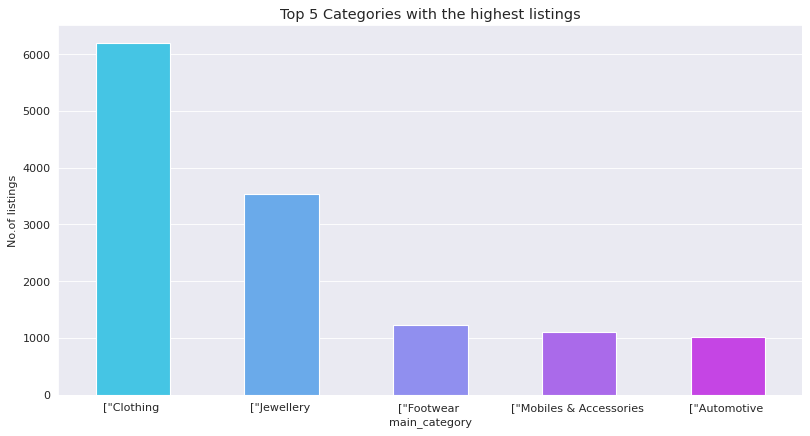

In [17]:
# Visualize the above results
main_cat_counts = flipkart['main_category'].value_counts().head()
plt.figure(figsize=(12, 6), dpi=80, frameon=True)
sns.barplot(data=flipkart, x=main_cat_counts.index, y=main_cat_counts.values, palette='cool', width=.5)
plt.title('Top 5 Categories with the highest listings', size=13)
plt.ylabel('No.of listings')
plt.show()

**Based on this statistics, the top 5 product categories on Flipkart, ranked by the number of listings, are Clothing with 6198 listings, followed by Jewellery with 3531 listings, Footwear with 1227 listings, Mobiles & Accessories with 1099 listings, and Automotive with 1012 listings. This data indicates the prominence of these categories in Flipkart's offerings, with clothing being the most prevalent category.**

**Which are the top 5 brands with the most product listings?**

In [18]:
flipkart.brand.value_counts().reset_index()

,brand,count
0,Allure Auto,469
1,Regular,313
2,Voylla,299
3,Slim,288
4,TheLostPuppy,229
...,...,...
3494,Hariom enterprises,1
3495,PerfectBlue,1
3496,morpankh Enterprise,1
3497,Lakiya,1


In [19]:
brand_counts = flipkart['brand'].value_counts().head()
fig = px.pie(brand_counts, values=brand_counts.values, names=brand_counts.index, title='Top Brands on Flipkart', hole=0.5)
fig.show()

**The analysis reveals that Allure Auto secures the top position among the brands featured on Flipkart, boasting 469(29.5%) product listings. Following closely behind is Regular with 313(19.45%) listings, indicating a notable presence in the marketplace. Voylla emerges as the third most prominent brand with 299(18.8%) listings, showcasing a strong assortment of offerings. Slim and TheLostPuppy round out the top five, with 288(17.9%) and 229(14.4%) listings respectively, contributing to the diverse array of brands available to Flipkart customers.**

**What is the average discount offered by Flipkart across all products?**

In [20]:
flipkart['discount_percentage'] = ((flipkart['retail_price'] - flipkart['discounted_price']) / flipkart['retail_price'])*100
avg_discount = flipkart['discount_percentage'].mean().round(decimals=2)
print("The average discount offered by Flipkart across all products is:", avg_discount, "%")

The average discount offered by Flipkart across all products is: 40.52 %


**How many products have customer ratings?**

In [21]:
flipkart[flipkart['product_rating'] != 'No rating available'].shape[0]

1849

**Only 1849 Products have customer ratings.**

**What percentage of products are part of the Flipkart Advantage program?**

In [22]:
# Calculate the percentage of True values in the 'is_FK_Advantage_product' column using the mean() method
FK_Advantage_products = flipkart['is_FK_Advantage_product'].mean() * 100
print(f"{FK_Advantage_products}% of products are part of the Flipkart Advantage program.")

3.925% of products are part of the Flipkart Advantage program.


**Which are the top 3 most expensive products listed on Flipkart?**

In [23]:
flipkart['retail_price'].nlargest(3).reset_index()

,index,retail_price
0,116,571230.0
1,11631,250500.0
2,11507,217500.0


**The top three most expensive products listed on Flipkart are notable for their luxury price tags. Topping the list is a product priced at ₹571,230, followed by items priced at ₹250,500 and ₹217,500, respectively. These high-value products likely cater to niche markets or offer premium features and craftsmanship, reflecting Flipkart's diverse product offerings to meet various customer preferences and budgets.**

**Which brands have the highest average product rating?**

In [24]:
# Replace the 'No rating' values with 0
flipkart['product_rating'] = flipkart['product_rating'].replace('No rating available', '0')

In [25]:
# Change the datatype of the column to float 
flipkart['product_rating'] = flipkart['product_rating'].astype('float')

In [26]:
flipkart.product_rating.dtype

dtype('float64')

In [27]:
flipkart.groupby('brand')['product_rating'].mean().sort_values(ascending=False).reset_index().loc[60:100]

,brand,product_rating
60,SYON,5.0
61,Zebie,5.0
62,Shivani Art,5.0
63,Nihar,5.0
64,zDelhi.com,5.0
65,Ambitione,5.0
66,Sharani,5.0
67,Funku Fashion,5.0
68,LGRL,5.0
69,SB RETAILS,5.0


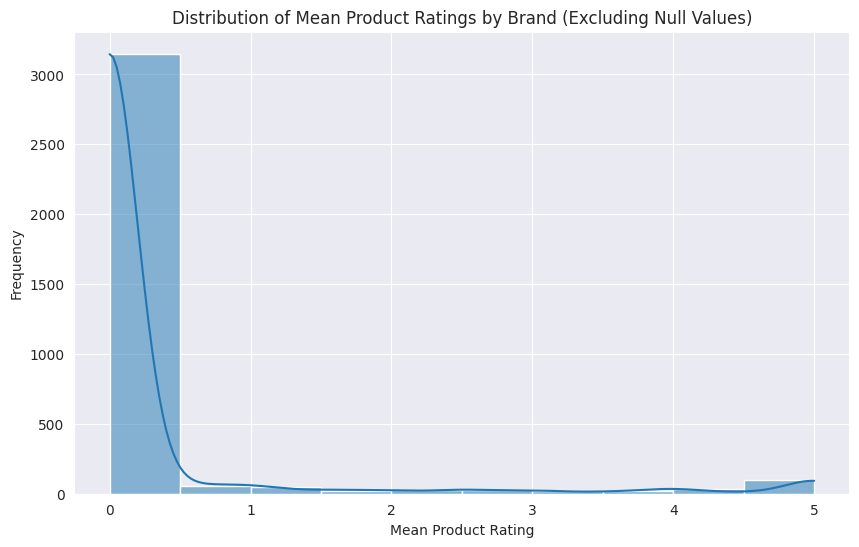

In [28]:
# Exclude null values from the product_rating column
valid_ratings = flipkart.dropna(subset=['product_rating'])

# Calculate the mean product rating for each brand and sort the values in descending order
brand_ratings = valid_ratings.groupby('brand')['product_rating'].mean().sort_values(ascending=False).reset_index()

# Plot the histogram using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=brand_ratings, x='product_rating', bins=10, kde=True)
plt.title('Distribution of Mean Product Ratings by Brand (Excluding Null Values)')
plt.xlabel('Mean Product Rating')
plt.ylabel('Frequency')
plt.show()

**Among the 88 brands, the highest average rating attained is 5.0. Additionally, only three brands achieved a rating of 4.8, while two brands received ratings of 4.7 and 4.6, respectively. Furthermore, four brands secured a rating of 4.5.** 

**Which product category has the highest average retail price?**

In [29]:
# Calculate average retail price per category, sort categories by average retail price (highest first)
flipkart.groupby('main_category')['retail_price'].mean().round(decimals=2).sort_values(ascending=False).reset_index().loc[1:60]

,main_category,retail_price
1,"[""Automation & Robotics",19999.00
2,"[""Rasav Jewels Yellow Gold Diamond 18 K Ring""]",13903.00
3,"[""Asics Gel-Kayano 22 Running Shoes""]",12499.00
4,"[""BALAJI EXPORTS Bottled Wine Cooler (9 Bottle...",10000.00
5,"[""Behringer Xenyx 502 Analog Sound Mixer""]",10000.00
6,"[""Pia International 10X70X70 WITH ZOOM SAKURA ...",9999.00
7,"[""SJ Comet Zoom DPSI Binoculars (30 mm, Black)""]",9999.00
8,"[""Skayvon SUMMERSIBLE SINGLE PHASE PUMP CONTRO...",9990.00
9,"[""COIRFIT Single Coir Mattress""]",9743.50
10,"[""SJ Barstel 56m / 1000m Binoculars (30 mm, Bl...",9649.00


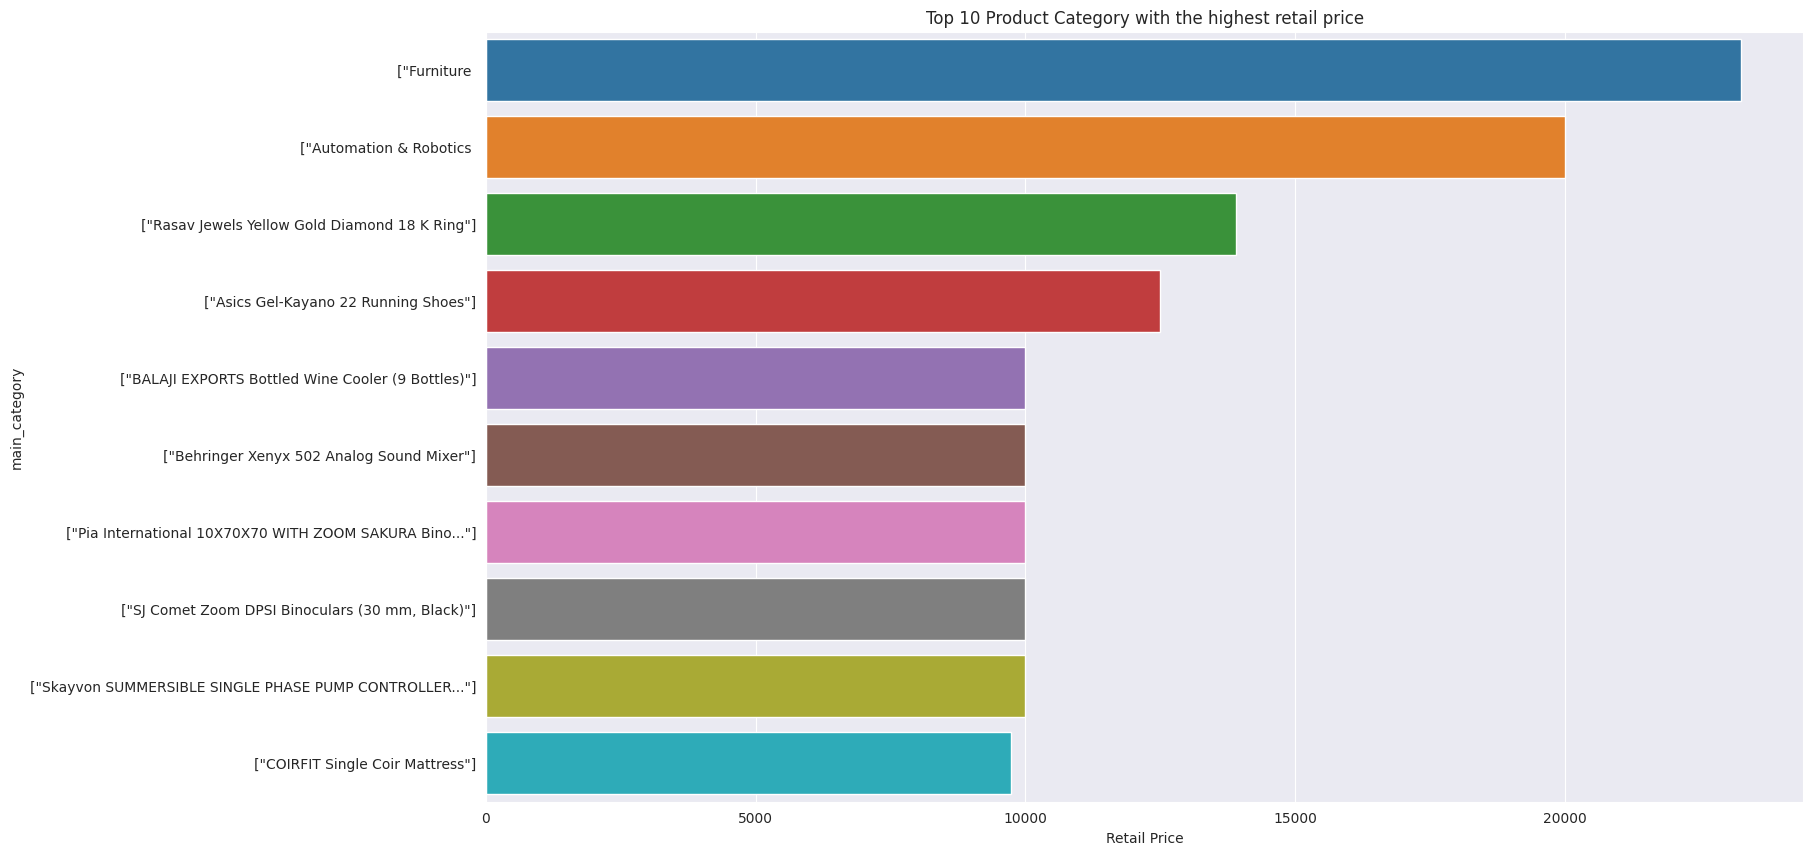

In [30]:
high_retail_price = flipkart.groupby('main_category')['retail_price'].mean().round(decimals=2).sort_values(ascending=False).head(10)
plt.figure(figsize=(17,10), frameon=True)
sns.barplot(flipkart, x=high_retail_price.values, y=high_retail_price.index)
plt.title('Top 10 Product Category with the highest retail price', size=12)
plt.xlabel('Retail Price')
plt.show()

**The product category with the highest average retail price falls within the range of 9,000 to 20,000 INR. This category encompasses items such as Automation & Robotics, premium jewelry pieces, high-end running shoes, and specialized optical equipment. These findings suggest that products requiring advanced technology, intricate craftsmanship, or specialized features tend to command higher retail prices on Flipkart.**

**Which products have the longest and shortest descriptions?**

In [31]:
max_len = flipkart['description'].str.len().nlargest()
min_len = flipkart['description'].str.len().nsmallest()
print('Index of the longest description:', max_len)
print('Index of the shortest description:', min_len)

Index of the longest description: 439      5309.0
457      5300.0
1481     4692.0
18752    4494.0
18267    4467.0
Name: description, dtype: float64
Index of the shortest description: 10952    74.0
10768    79.0
19241    79.0
10797    83.0
10809    84.0
Name: description, dtype: float64


**The longest description belongs to products with index numbers 439 and 457, with a length of 5309.0 characters (assuming these values represent character counts).
Multiple products share the title of having the shortest descriptions. Products with indices 10952, 10768, 19241, 10797, and 10809 all have descriptions that are only 74 to 84 characters long.**

**In which month was the data mostly crawled?**

In [32]:
flipkart['crawl_timestamp'].dt.month.value_counts().reset_index()

,crawl_timestamp,count
0,12,10315
1,1,4850
2,3,1634
3,4,1137
4,6,1046
5,5,773
6,2,245


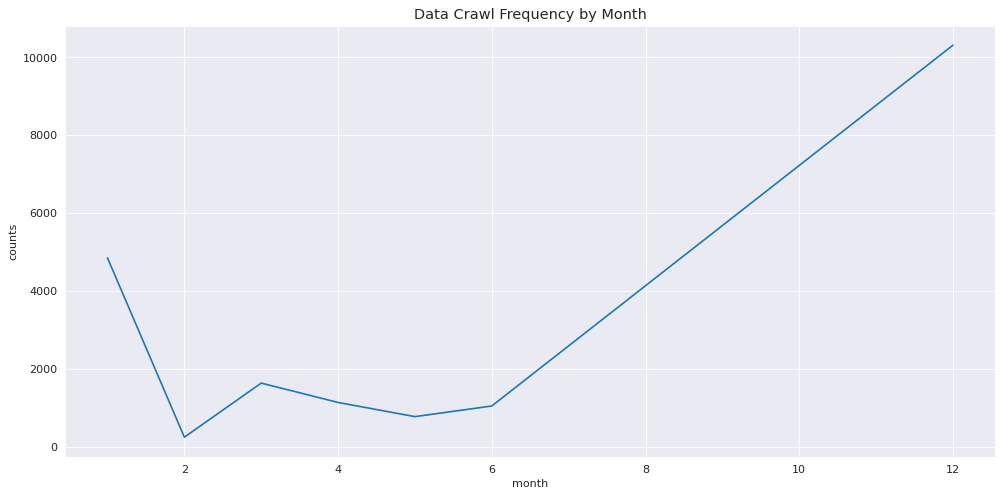

In [33]:
month_counts = flipkart['crawl_timestamp'].dt.month.value_counts().reset_index()
plt.figure(figsize=(15,7), dpi=80, frameon=True)
month_counts.columns = ['month', 'counts']
sns.lineplot(x='month', y='counts', data=month_counts)
plt.title('Data Crawl Frequency by Month', size=13)
plt.show()

**The data indicates that the crawling activity peaked in December, with 10,315 instances recorded, suggesting that December was the month when the dataset was most extensively crawled. Conversely, the crawling activity was comparatively lower in other months, with January having the next highest count of 4,850 instances.**

In [34]:
# flipkart['description_len'] = flipkart['description'].apply(len)

In [35]:
flipkart

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,main_category,discount_percentage
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,0.0,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...","[""Clothing",62.062062
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23+00:00,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,0.0,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...","[""Furniture",29.576764
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23+00:00,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,0.0,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...","[""Footwear",50.050050
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23+00:00,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,0.0,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...","[""Clothing",61.802575
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23+00:00,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,0.0,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",...","[""Pet Supplies",4.545455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,7179d2f6c4ad50a17d014ca1d2815156,2015-12-01 10:15:43+00:00,http://www.flipkart.com/walldesign-small-vinyl...,WallDesign Small Vinyl Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7KFJAKSTDY9G,1500.0,730.0,"[""http://img6a.flixcart.com/image/wall-decorat...",False,Buy WallDesign Small Vinyl Sticker for Rs.730 ...,0.0,No rating available,WallDesign,"{""product_specification""=>[{""key""=>""Number of ...","[""Baby Care",51.333333
19996,71ac419198359d37b8fe5e3fffdfee09,2015-12-01 10:15:43+00:00,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE9F5URNQGJCGH,1429.0,1143.0,"[""http://img6a.flixcart.com/image/sticker/z/g/...",False,Buy Wallmantra Large Vinyl Stickers Sticker fo...,0.0,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ...","[""Baby Care",20.013996
19997,93e9d343837400ce0d7980874ece471c,2015-12-01 10:15:43+00:00,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7VAYDKQZEBSD,1299.0,999.0,"[""http://img5a.flixcart.com/image/sticker/b/s/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,0.0,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ...","[""Baby Care",23.094688
19998,669e79b8fa5d9ae020841c0c97d5e935,2015-12-01 10:15:43

In [36]:
# flipkart.to_csv('Flipkart1.csv')